In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# Output visualization: stats on the parameters

## per nodes

In [2]:
def plot_data_nodes(radius, n, res, t):

    # check the t type
    if t:
        thr = 'maxpred'
    else : thr = 'pred'

    fig, axs = plt.subplots(len(radius), 3, figsize = (14,25))
    for i, r in enumerate(radius):
        # load data
        data = pd.read_csv('data/{}/data_node_{}_{}.csv'.format(thr, n, r))
        # plot data
        axs[i,0].set_title('Metrics with r = {}'.format(round(r,7)), fontsize=15)
        _ = axs[i,0].boxplot([data.loc[data.resistance == k, 'metric'] for k in res], positions = range(1,len(res)+1), labels=res)
        _ = axs[i,0].set_xlabel('resistance (t)', fontsize=12)
        axs[i,1].set_title('Max levels with r = {}'.format(round(r,6)), fontsize=15)
        _ = axs[i,1].boxplot([data.loc[data.resistance == k, 'max_level'] for k in res], positions = range(1,len(res)+1), labels=res)
        _ = axs[i,1].set_xlabel('resistance (t)', fontsize=12)
        axs[i,2].set_title('Avg levels with r = {}'.format(round(r,6)), fontsize=15)
        _ = axs[i,2].boxplot([data.loc[data.resistance == k, 'avg_level'] for k in res], positions = range(1,len(res)+1), labels=res)
        _ = axs[i,2].set_xlabel('resistance (t)', fontsize=12)
        # delete from memory
        del data

    plt.suptitle('Data visualization for n = {}'.format(n), y=1.01, fontsize=20)
    plt.tight_layout()
    plt.savefig('images/stats_per_node_{}_{}.jpeg'.format(thr, n))

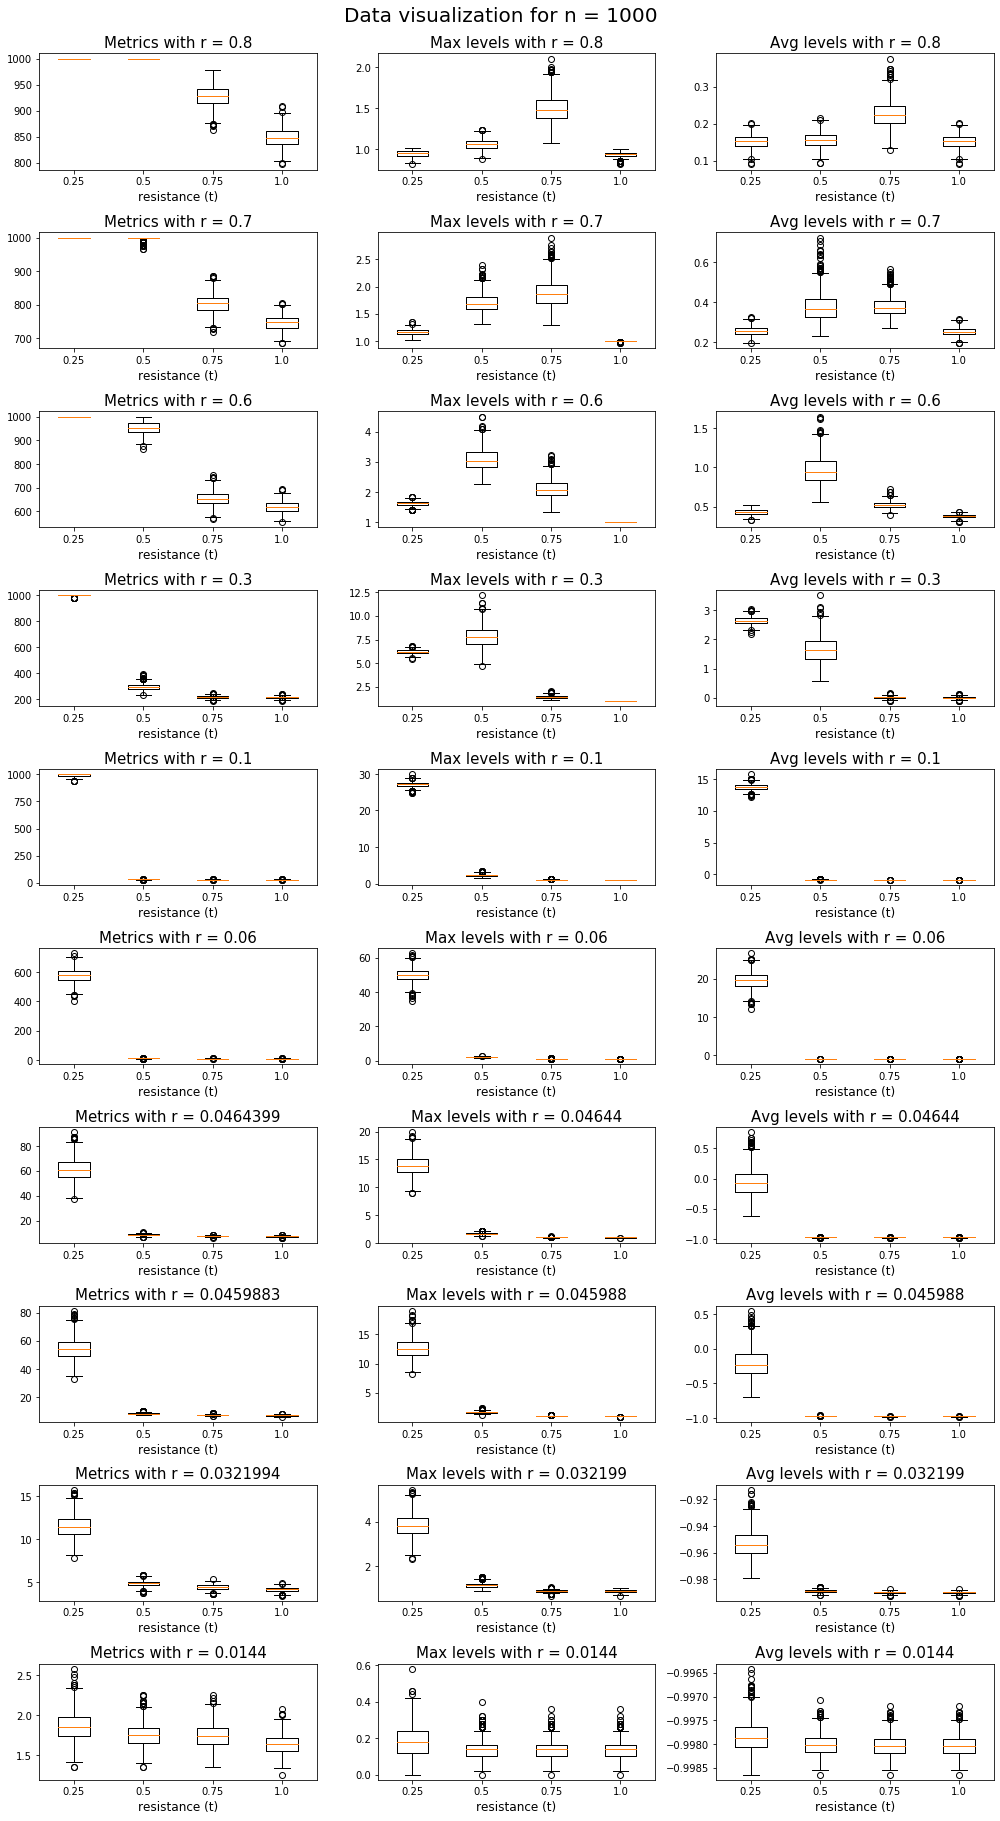

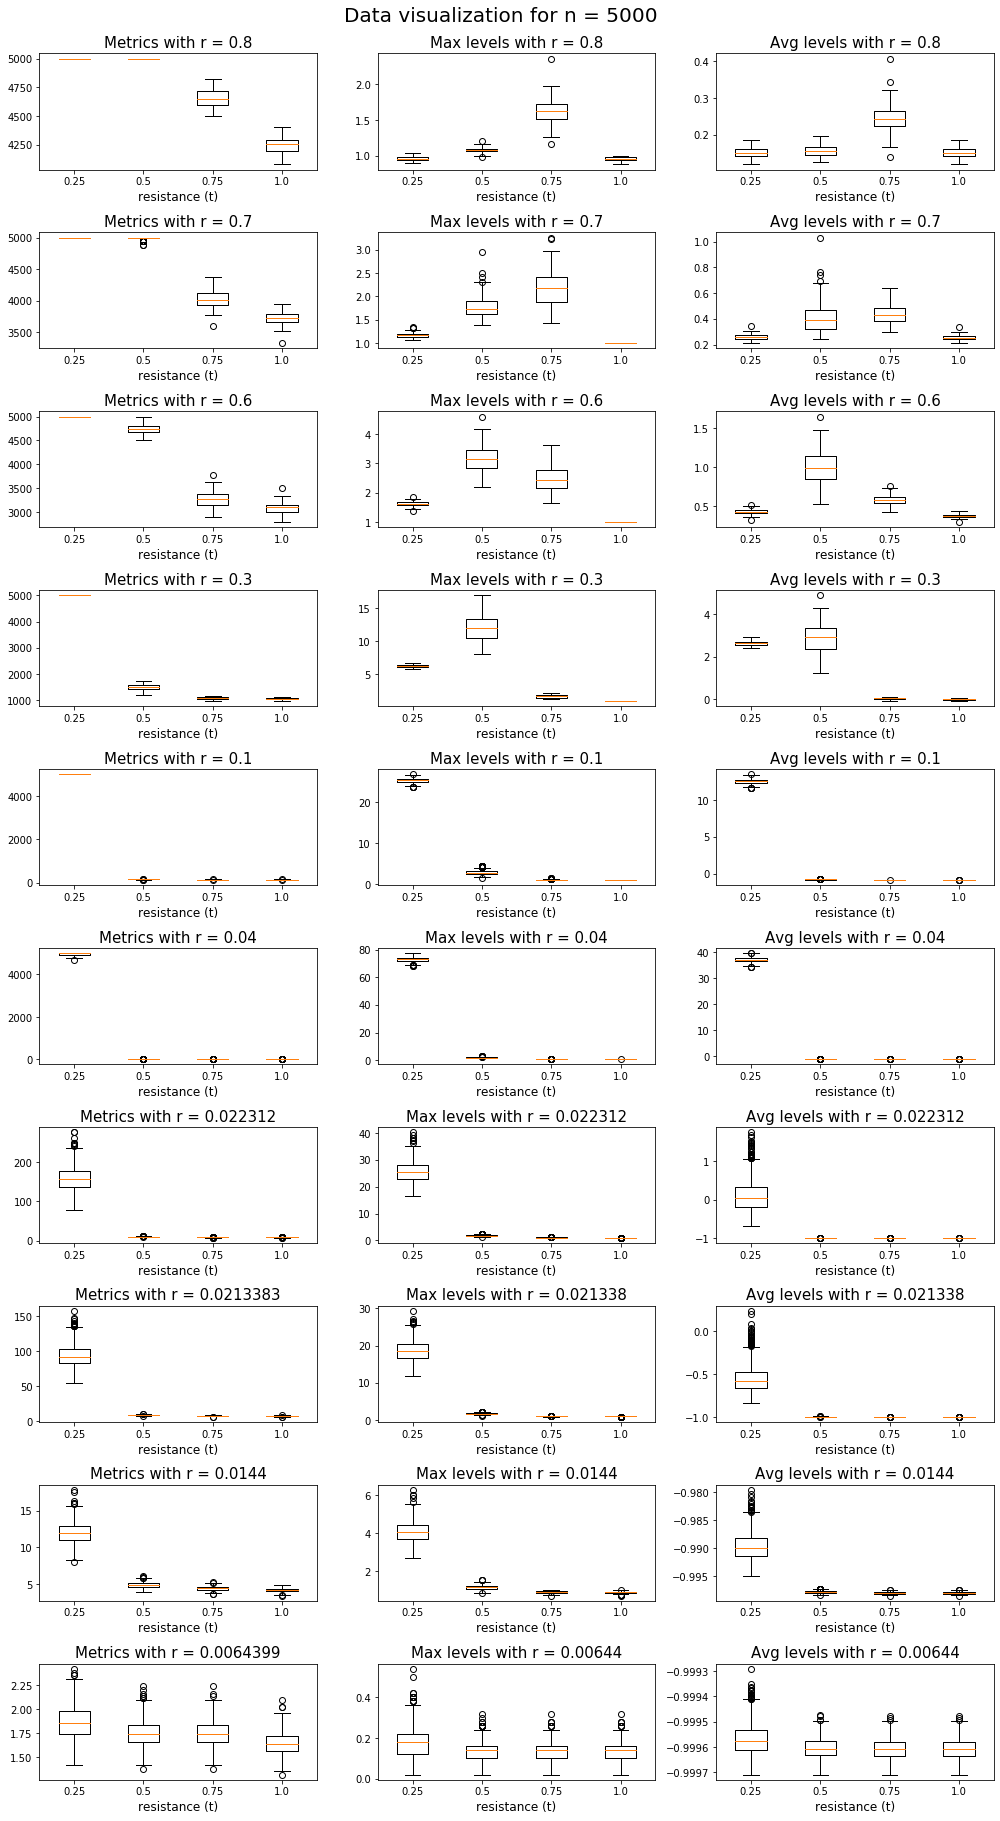

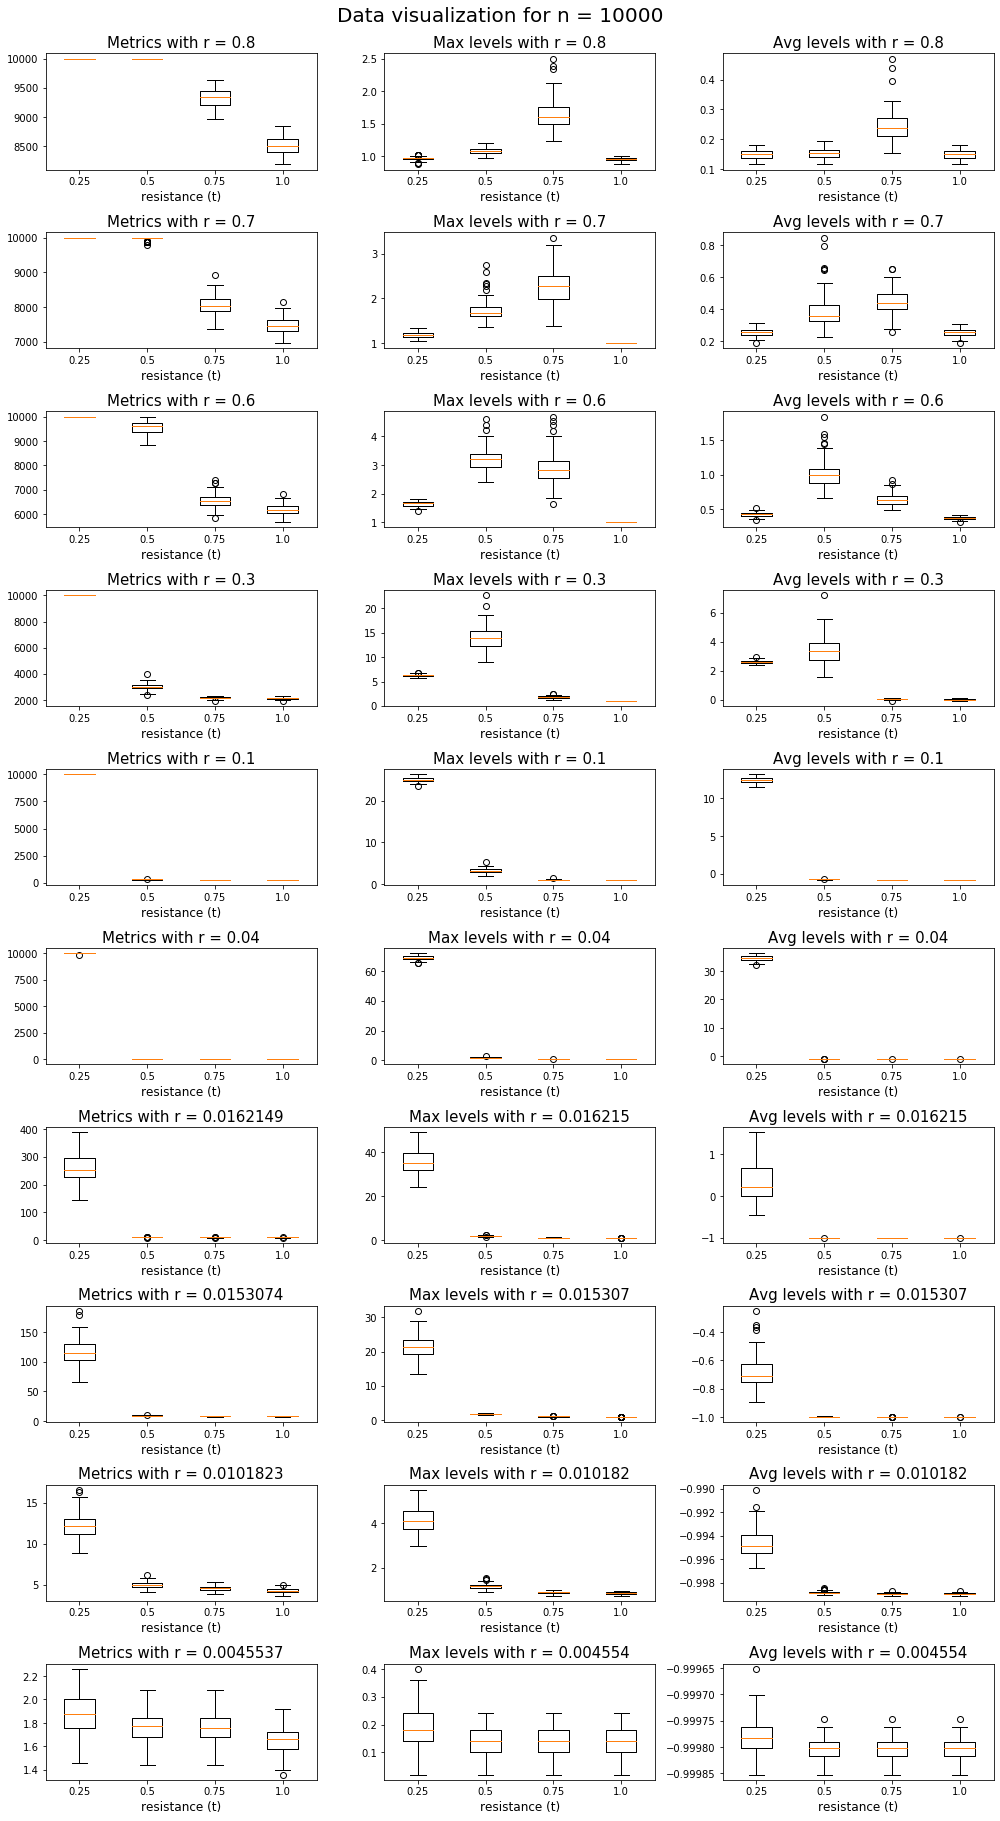

In [9]:
# type of threshold: True = maxpred, False = pred
t = False

# reading resistances
res = np.load('data/res_phase1.npy')

for n in [1000, 5000, 10000]:
    with open('data/keys{}.txt'.format(n), 'r') as f:
        radius = eval(f.read())
        radius.sort(reverse=True)
    plot_data_nodes(radius, n, res, t)

## per graphs

In [10]:
def plot_data_graphs(radius, n, t):
    # check the t type
    if t:
        thr = 'maxpred'
    else : thr = 'pred'
        
    fig, axs = plt.subplots(len(radius), 3, figsize = (14,25))
    for i, r in enumerate(radius):
        # load data
        raw_data = pd.read_csv('data/{}/data_{}_{}.csv'.format(thr,  n, r), index_col=0)
        data = pd.read_csv('data/{}/data_graph_{}_{}.csv'.format(thr,  n, r)).set_index('resistance')
        data_min = raw_data.groupby('resistance').min()[['metric', 'max_level', 'avg_level']]
        data_max = raw_data.groupby('resistance').max()[['metric', 'max_level', 'avg_level']]
        # plot data
        axs[i,0].set_title('Metrics with p = {}'.format(round(r,6)), fontsize=15)
        data['metric'].transpose().plot(kind='line',ax=axs[i,0], color='m')
        axs[i,0].fill_between(data_min.index, data_min['metric'].values, data_max['metric'].values, alpha='0.2')
        
        axs[i,1].set_title('Max levels with p = {}'.format(round(r,6)), fontsize=15)
        data['max_level'].transpose().plot(kind='line',ax=axs[i,1], color='m')
        axs[i,1].fill_between(data_min.index, data_min['max_level'].values, data_max['max_level'].values, alpha='0.2')
        
        axs[i,2].set_title('Avg levels with p = {}'.format(round(r,6)), fontsize=15)
        data['avg_level'].transpose().plot(kind='line',ax=axs[i,2], color='m')
        axs[i,2].fill_between(data_min.index, data_min['avg_level'].values, data_max['avg_level'].values, alpha='0.2')
        
        # delete from memory
        del data, data_min, data_max

    #plt.suptitle('Data visualization for n = {}, {}'.format(n), y=1.01, fontsize=20)
    plt.tight_layout()
    plt.savefig('images/stats_per_rgg_{}_{}.jpeg'.format(thr, n), bbox_inches='tight')

[0.8, 0.7, 0.6, 0.3, 0.1, 0.06, 0.04643989029049284, 0.04598834429845876, 0.03219937887599697, 0.014400000000000001]
[0.8, 0.7, 0.6, 0.3, 0.1, 0.04, 0.022311989807061363, 0.021338332552616968, 0.0144, 0.006439875775199394]
[0.8, 0.7, 0.6, 0.3, 0.1, 0.04, 0.01621488773589164, 0.01530744386794582, 0.010182337649086283, 0.004553679830642466]


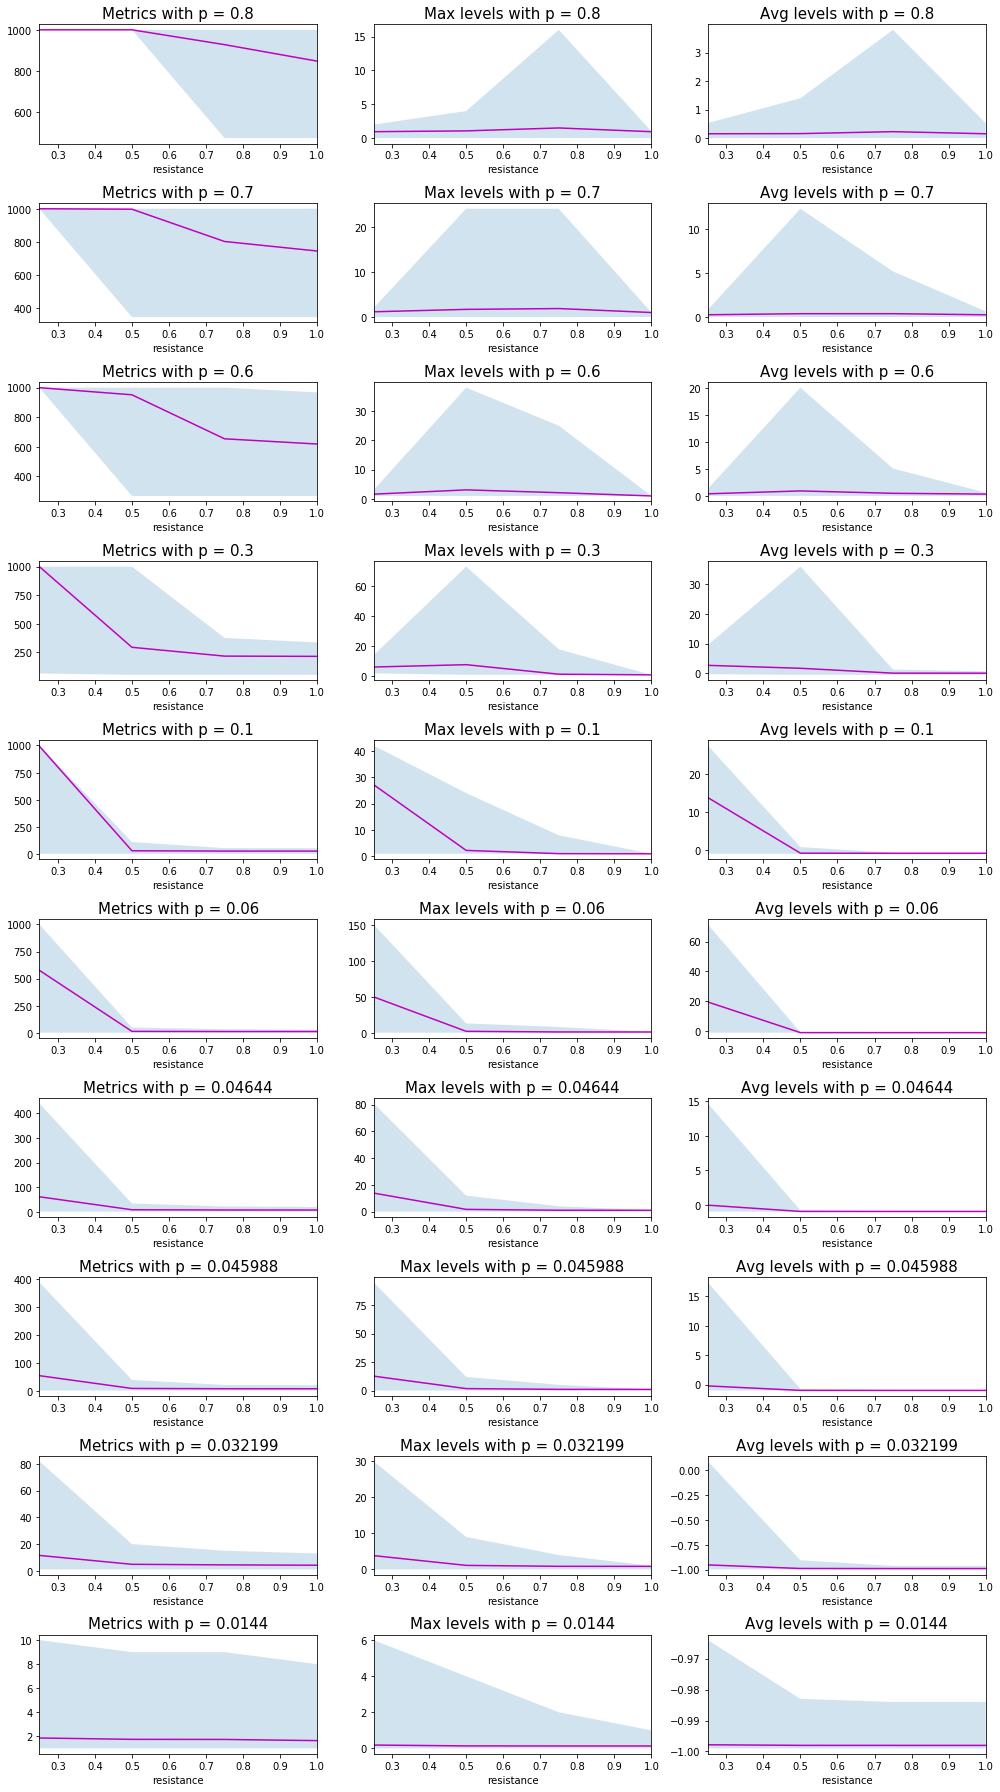

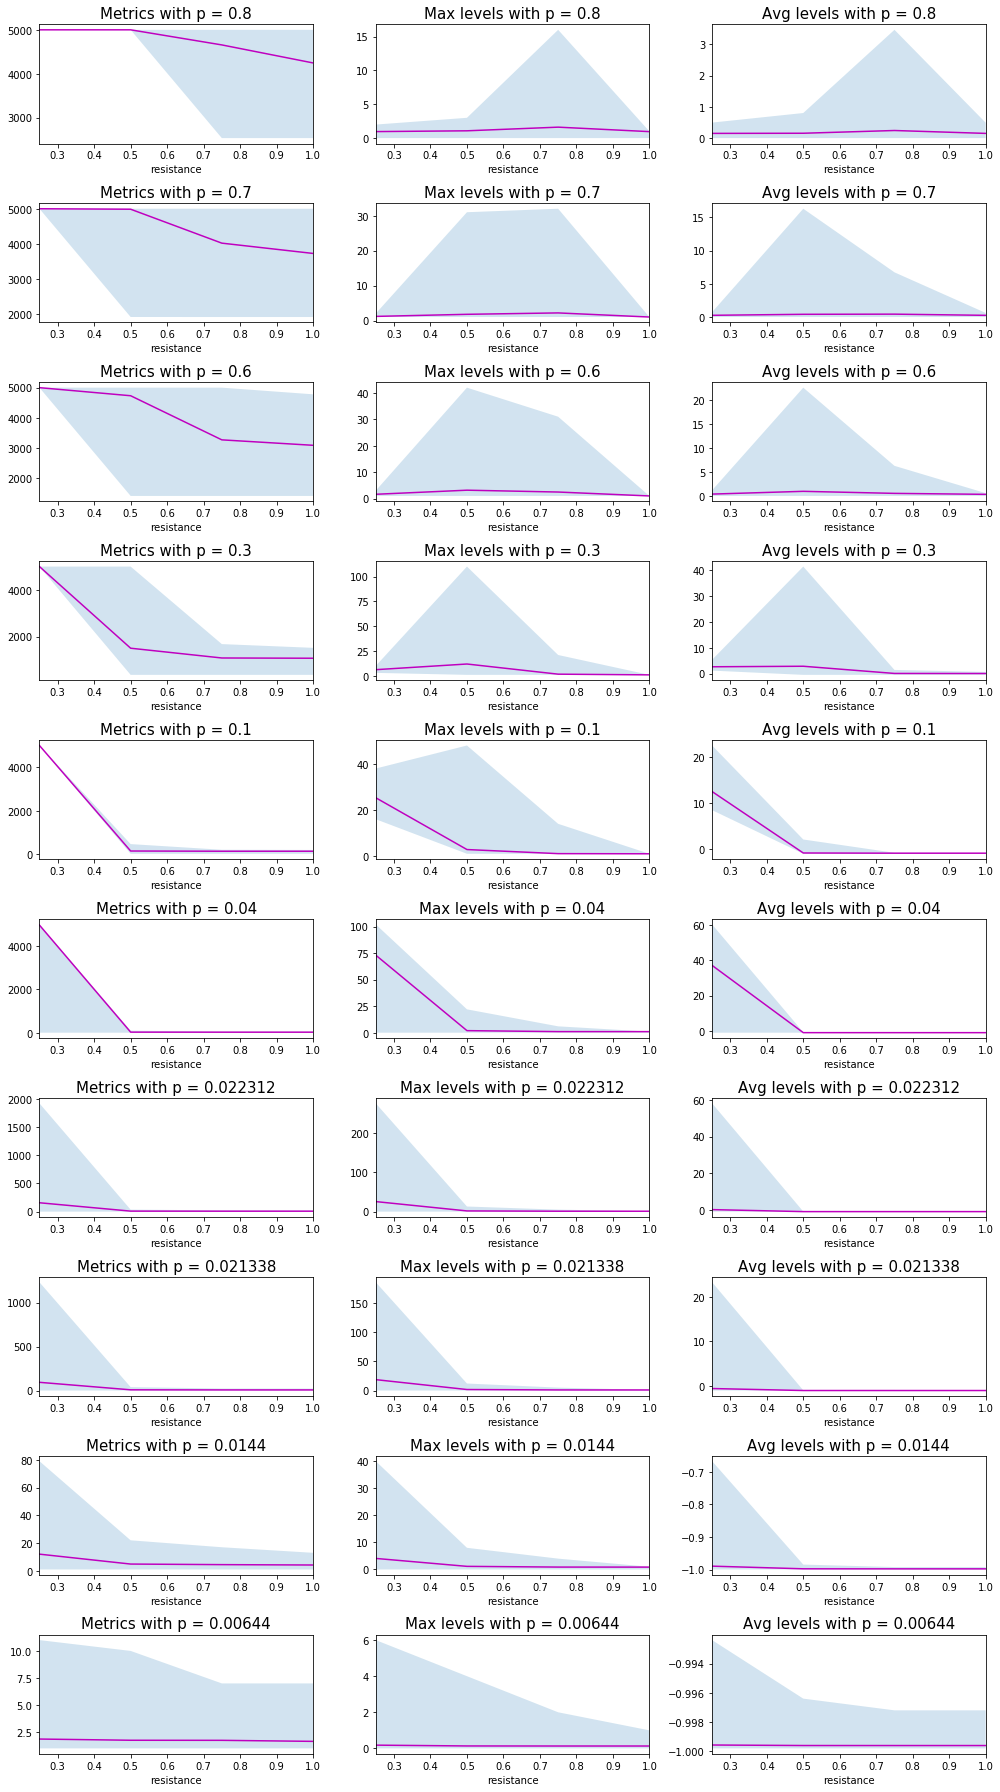

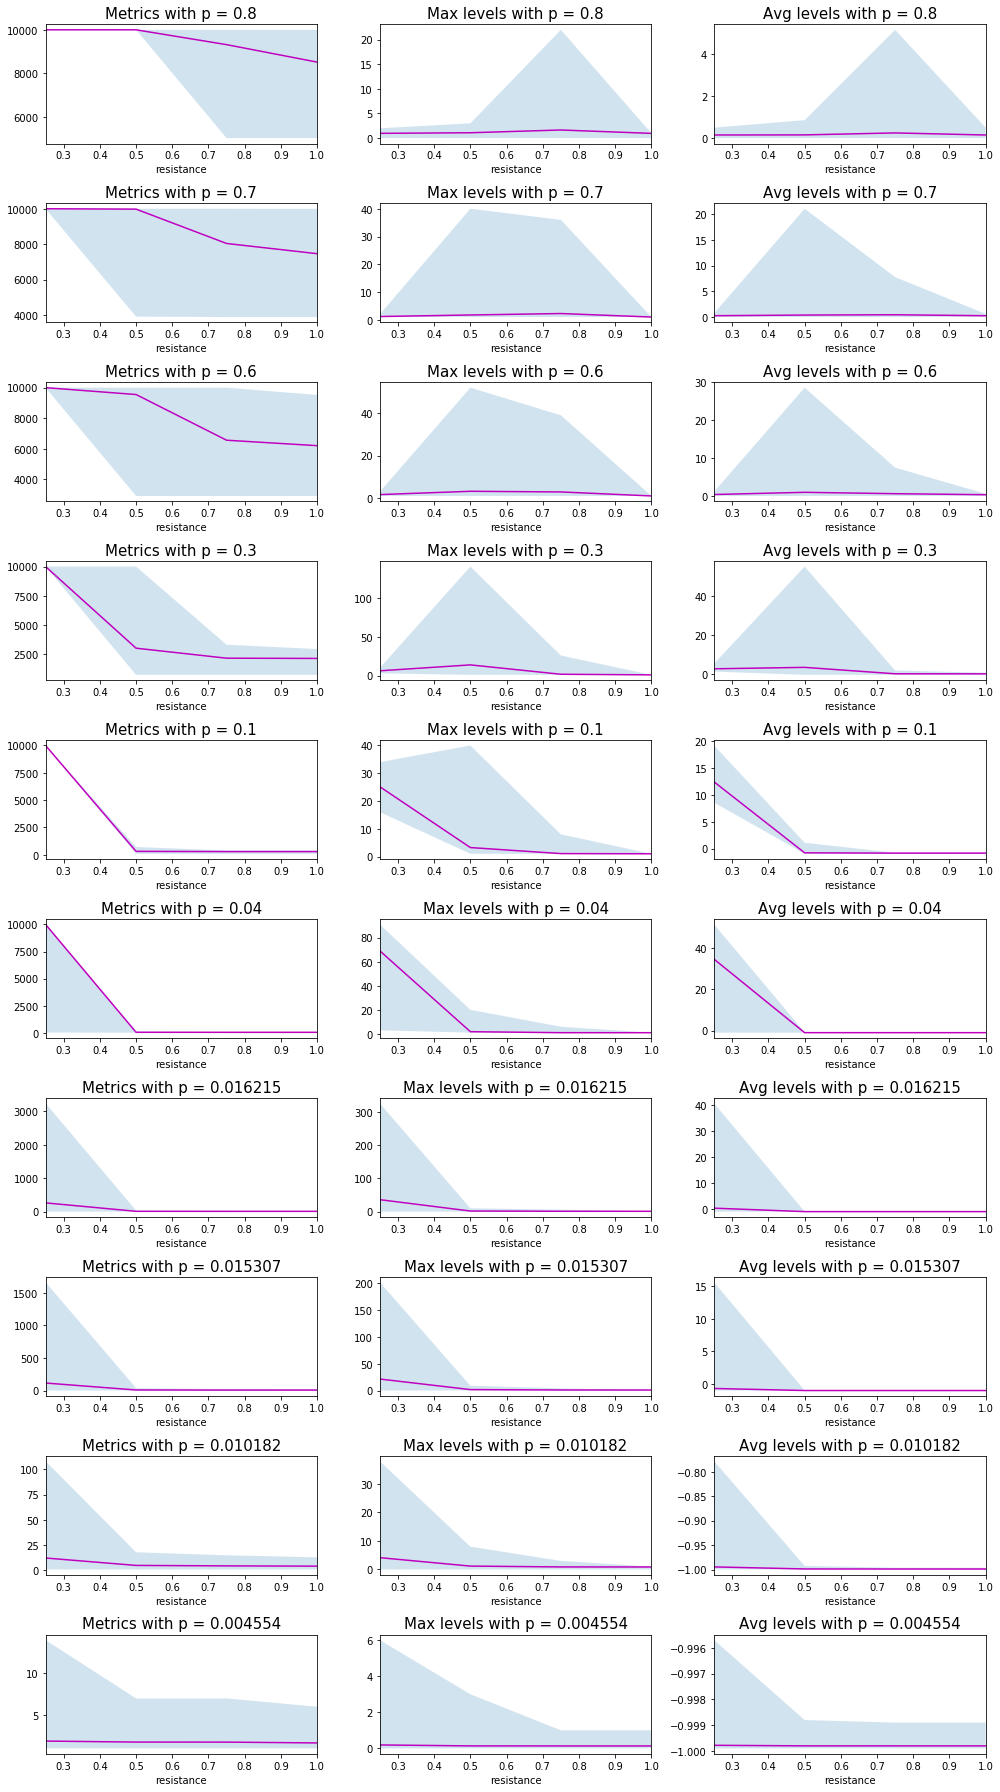

In [11]:
# type of threshold: True = maxpred, False = pred
t = False
sizes = [1000, 5000, 10000]
#sizes = [1000, 5000]

for n in sizes:
    with open('data/keys{}.txt'.format(n), 'r') as f:
        radius = eval(f.read())
        radius.sort(reverse=True)
        print(radius)
    plot_data_graphs(radius, n, t)

[0.8, 0.7, 0.6, 0.3, 0.1, 0.06, 0.04643989029049284, 0.04598834429845876, 0.03219937887599697, 0.014400000000000001]
[0.8, 0.7, 0.6, 0.3, 0.1, 0.04, 0.022311989807061363, 0.021338332552616968, 0.0144, 0.006439875775199394]
[0.8, 0.7, 0.6, 0.3, 0.1, 0.04, 0.01621488773589164, 0.01530744386794582, 0.010182337649086283, 0.004553679830642466]


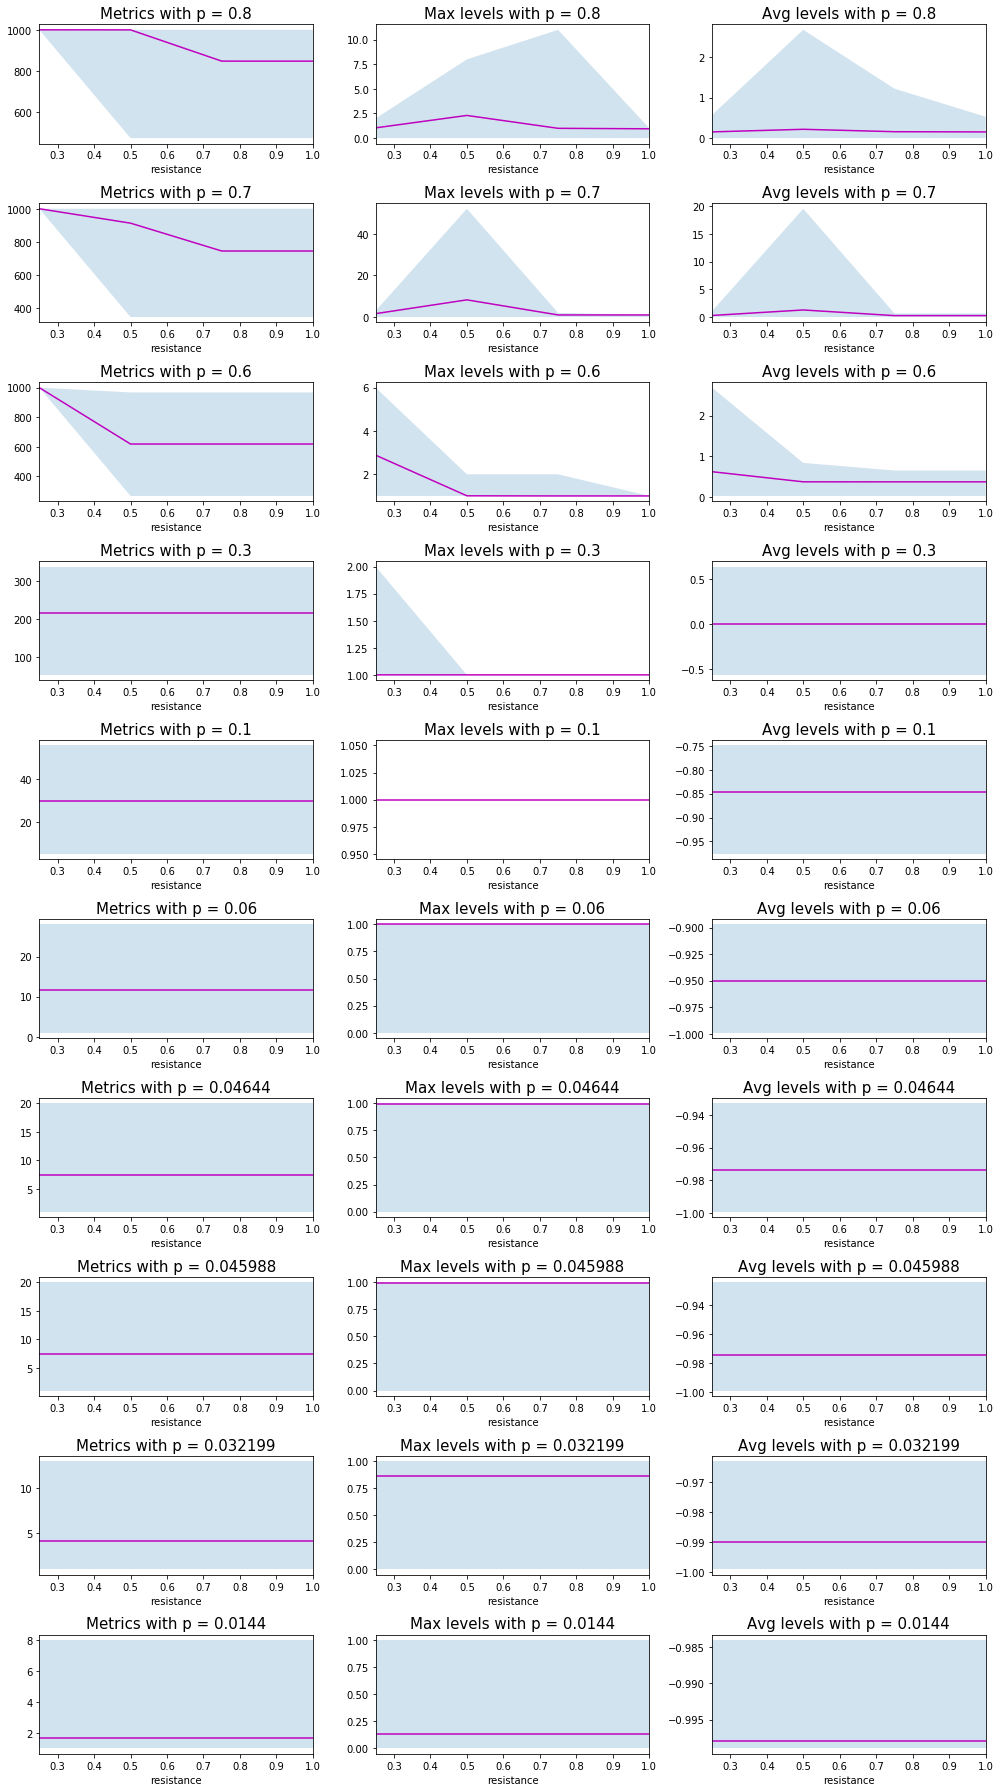

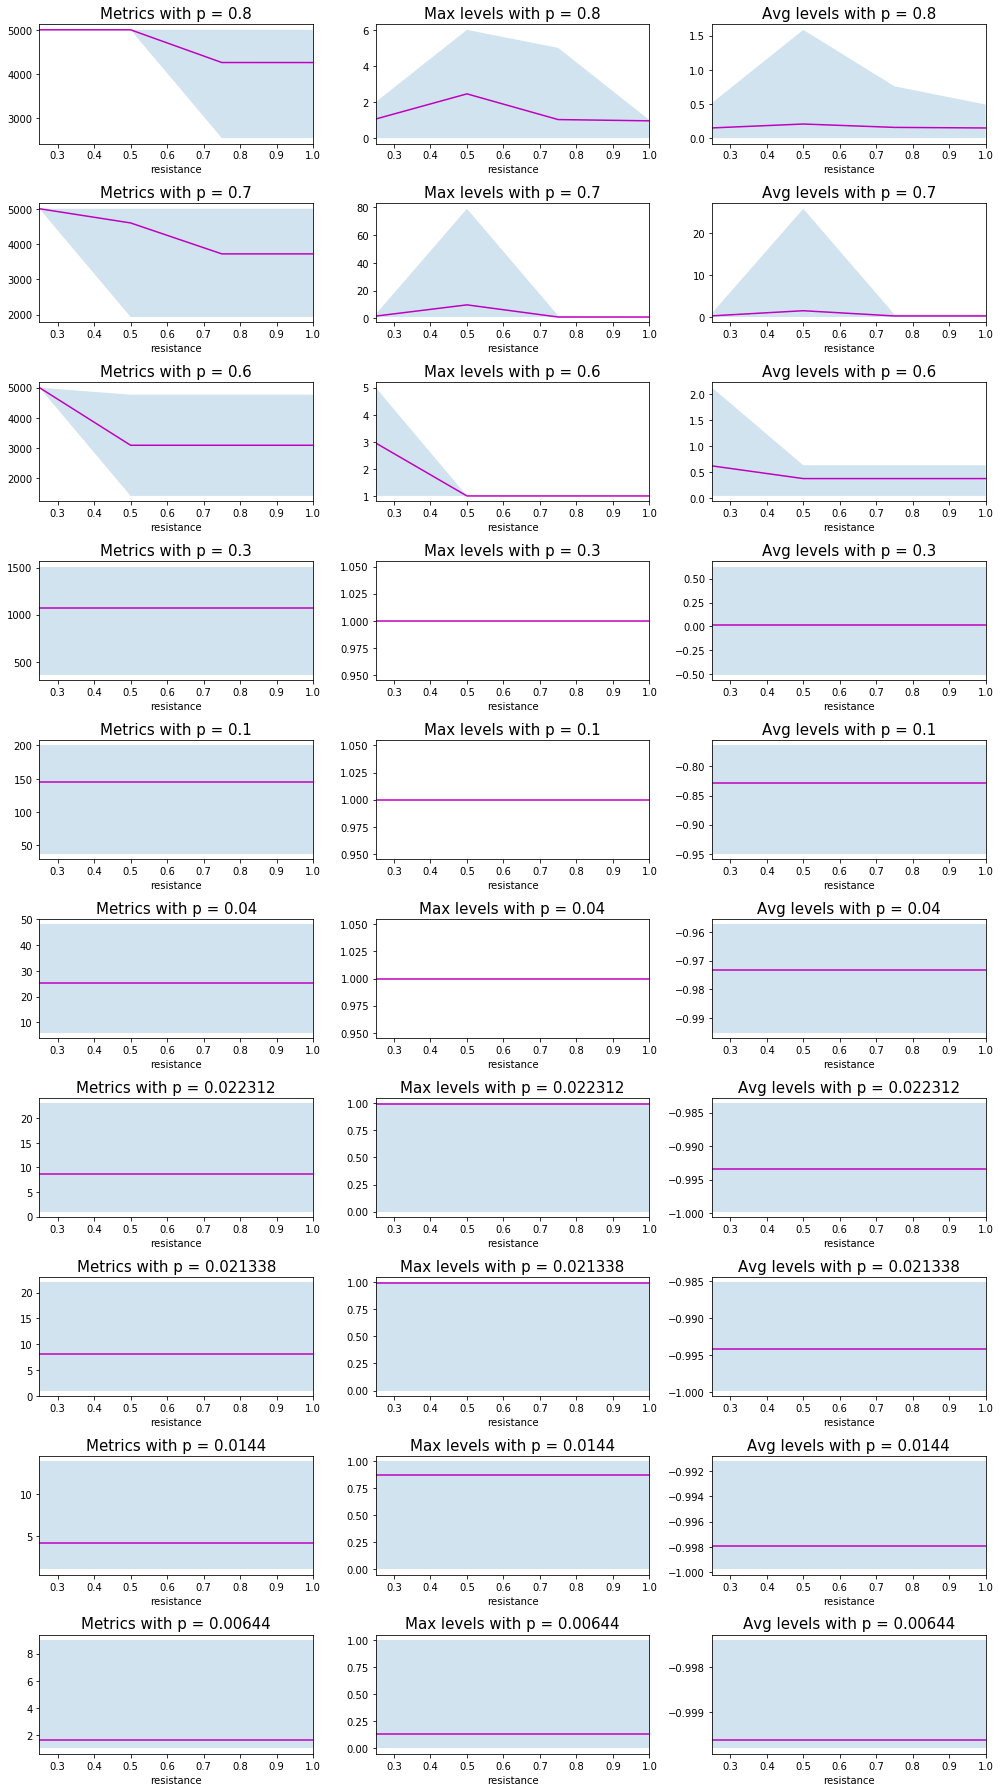

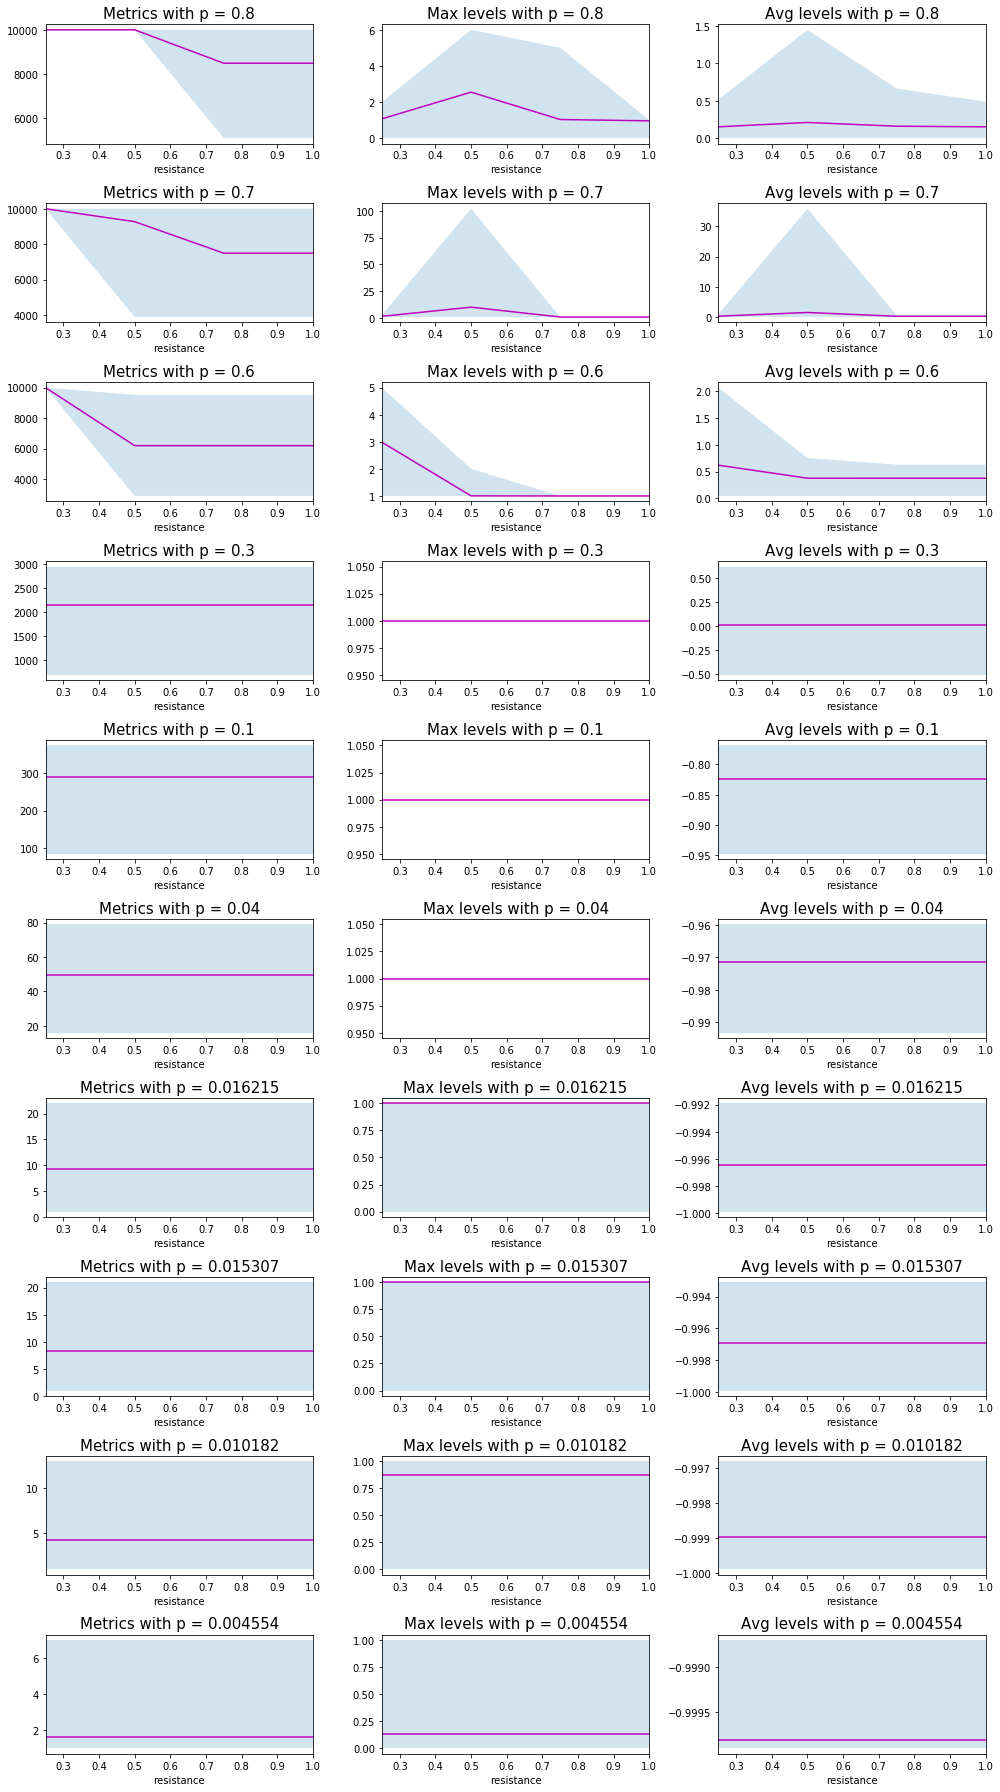

In [12]:
# type of threshold: True = maxpred, False = pred
t = True
sizes = [1000, 5000, 10000]
#sizes = [1000, 5000]

for n in sizes:
    with open('data/keys{}.txt'.format(n), 'r') as f:
        radius = eval(f.read())
        radius.sort(reverse=True)
        print(radius)
    plot_data_graphs(radius, n, t)

## Metric visualization


In [25]:
def plot_metric_counts(prob, n, res, t):
    # check the t type
    if t:
        thr = 'maxpred'
    else : thr = 'pred'

    fig, axs = plt.subplots(len(prob), len(res), figsize = (14,25))
    for i, p in enumerate(prob):
        # load data
        temp = pd.read_csv('data/{}/data_node_{}_{}.csv'.format(thr, n, p))
        for j, group in enumerate(temp[['metric','resistance']].groupby('resistance')):
            # plot 
            axs[i,j].set_title('p = {}, t = {}'.format(round(p,6),group[0]), fontsize=15)
            _ = axs[i,j].hist(group[1].metric.values, color='coral', bins = 10, density = True, alpha = 0.7)
        
        # delete from memory
        del temp

    #plt.suptitle('Metric histogram, n={}'.format(n), y=1.01, fontsize=20)
    plt.tight_layout()
    plt.savefig('images/comulative_metric_{}_{}.jpeg'.format(thr, n))

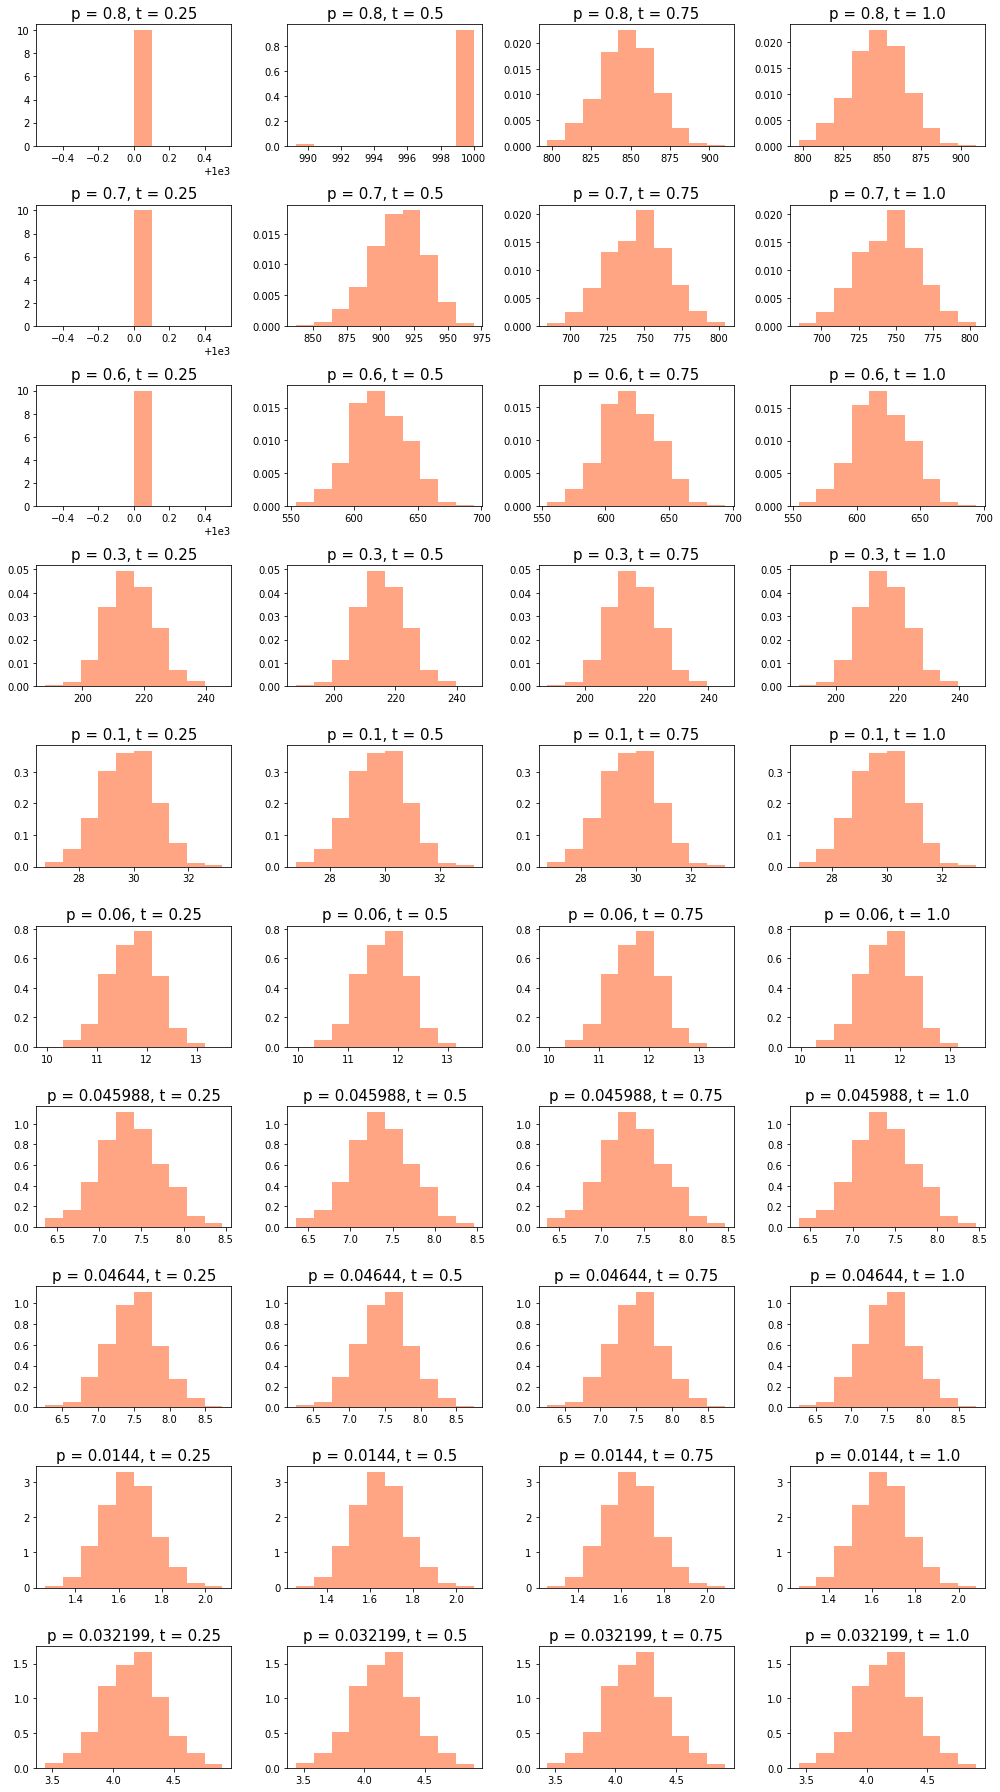

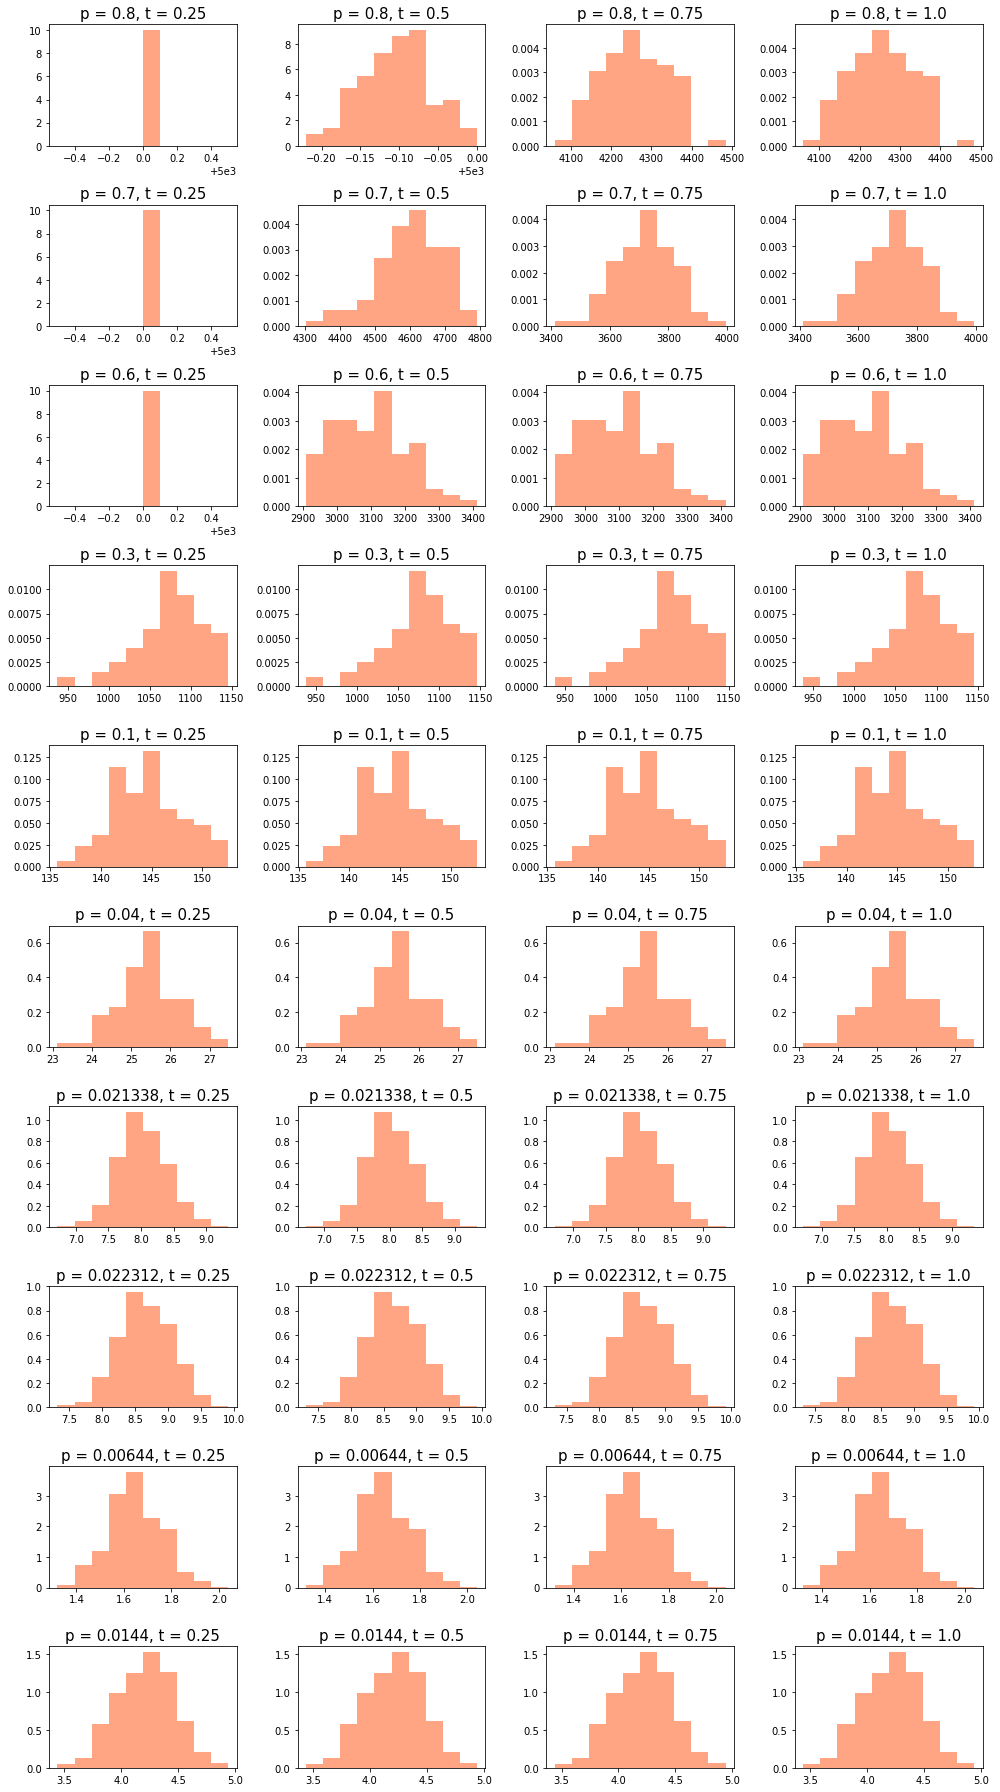

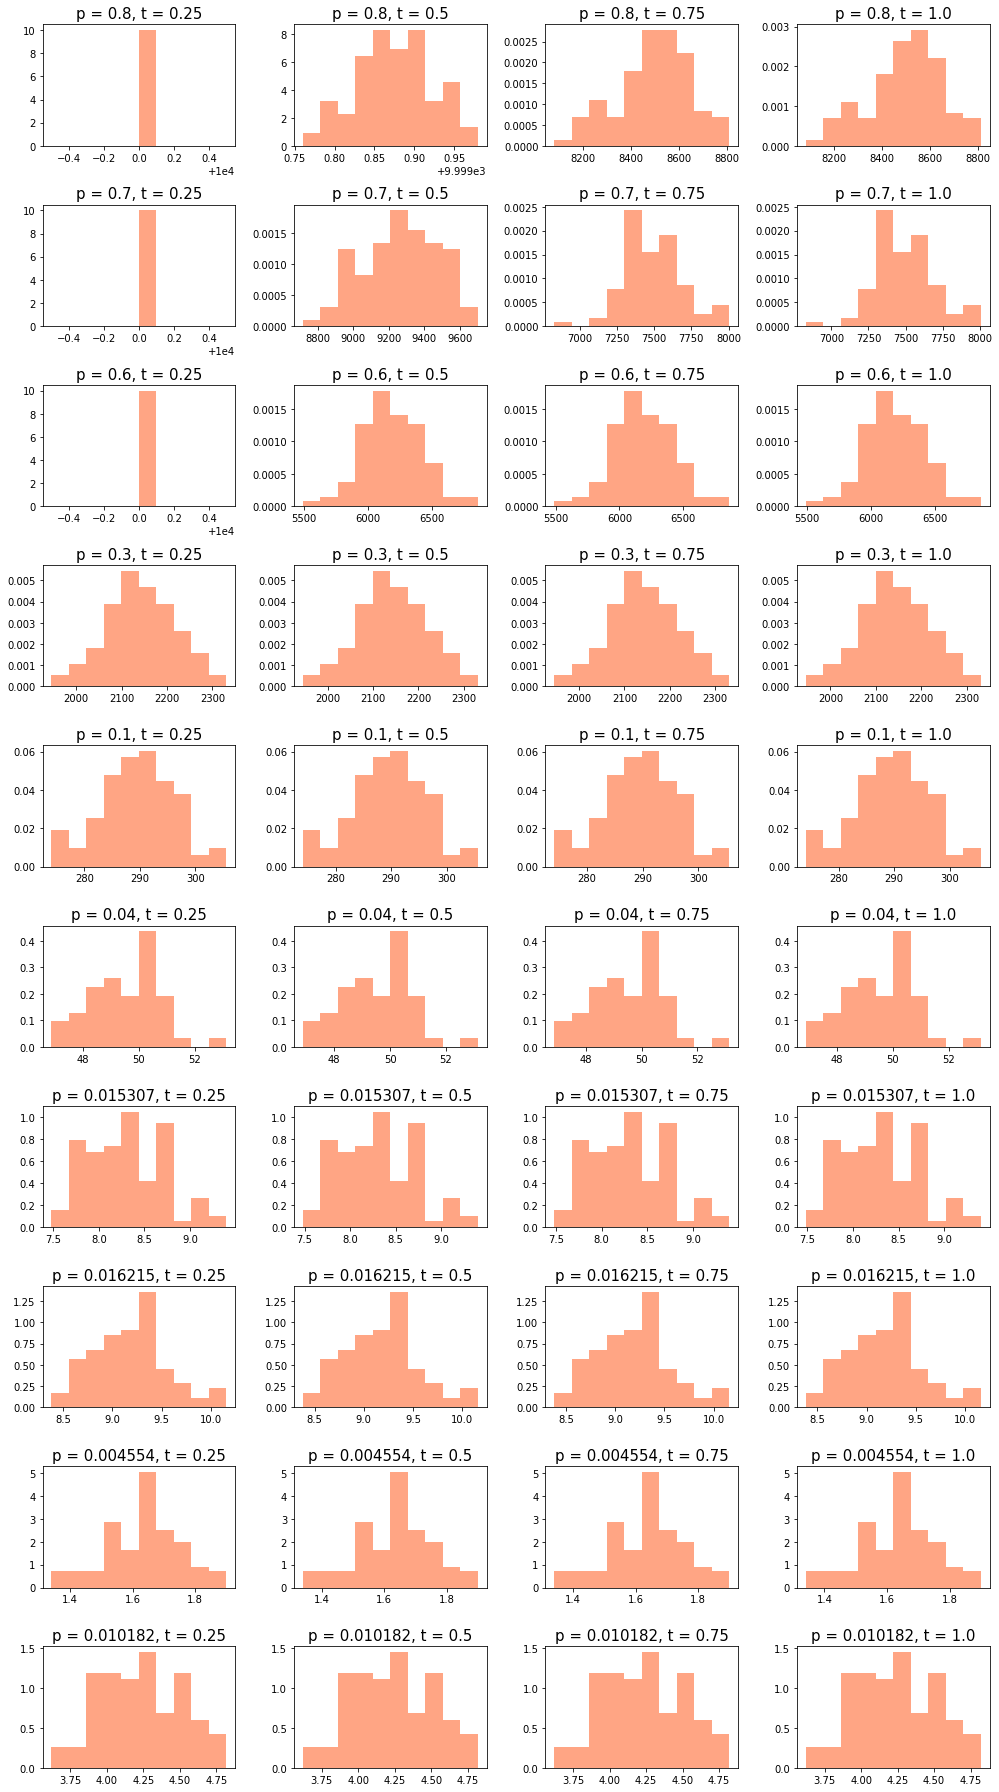

In [26]:
t = True

# reading resistances
res = np.load('data/res_phase1.npy')

for n in [1000, 5000, 10000]:
    with open('data/keys{}.txt'.format(n), 'r') as f:
        prob = eval(f.read())
    plot_metric_counts(prob, n, res, t)

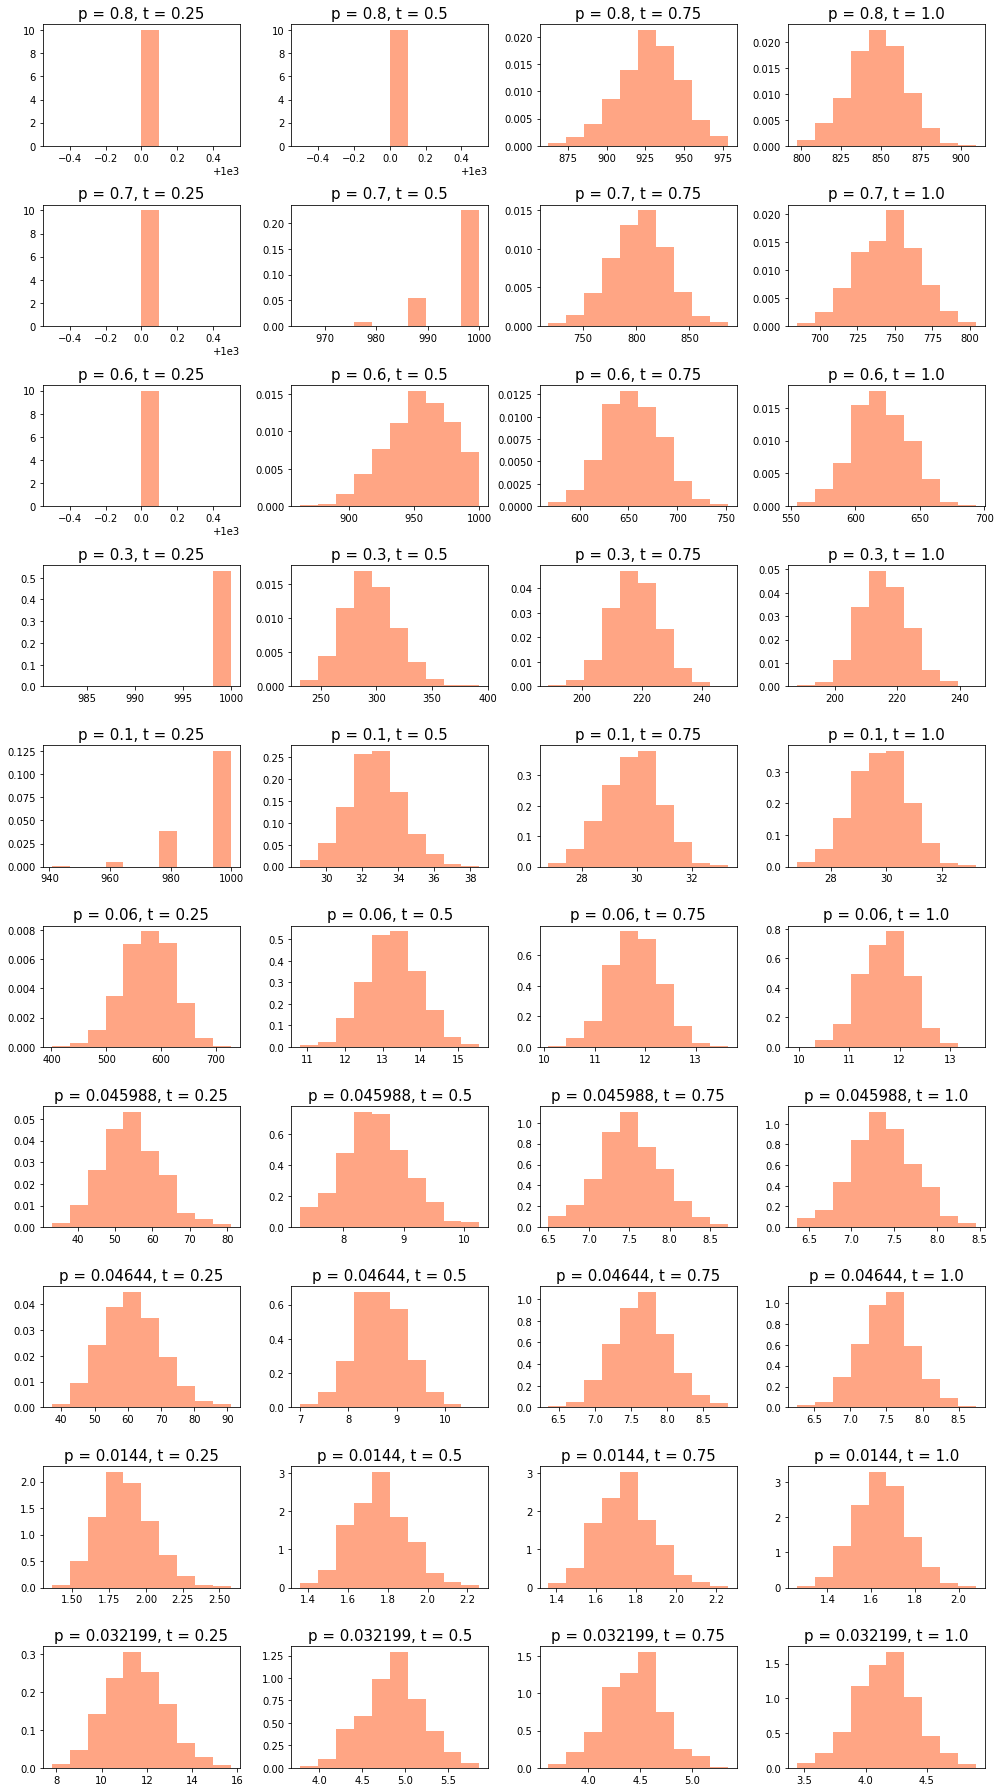

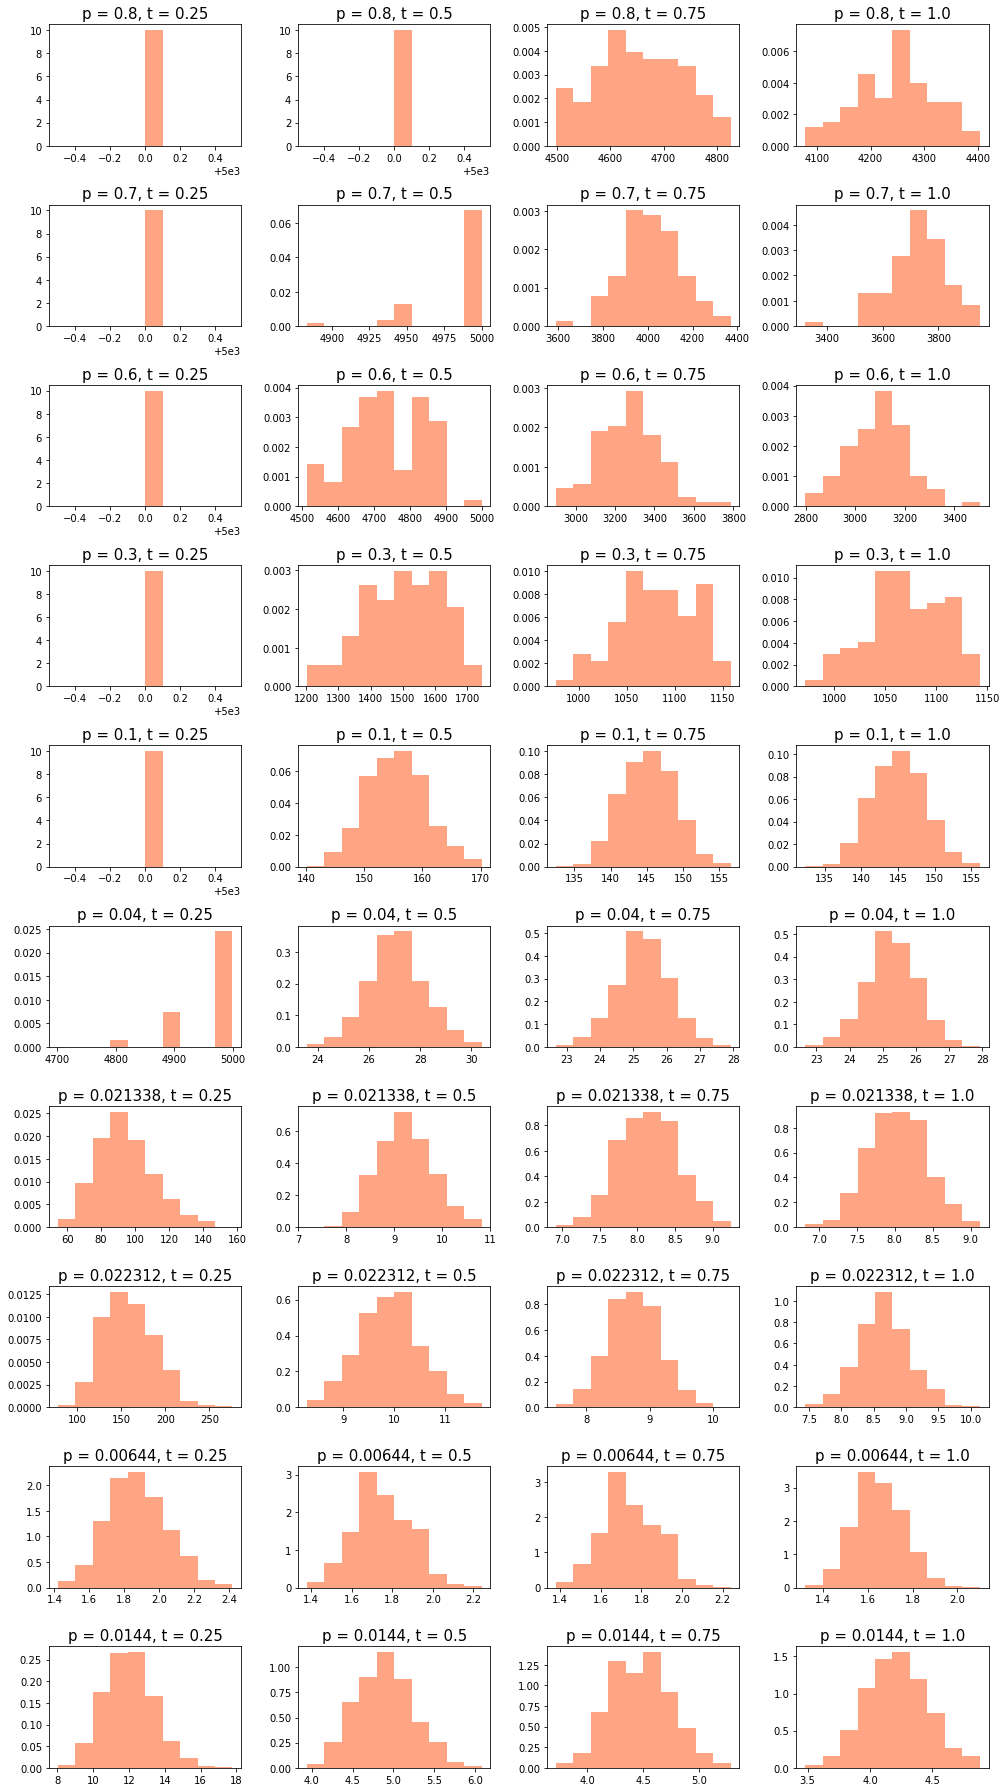

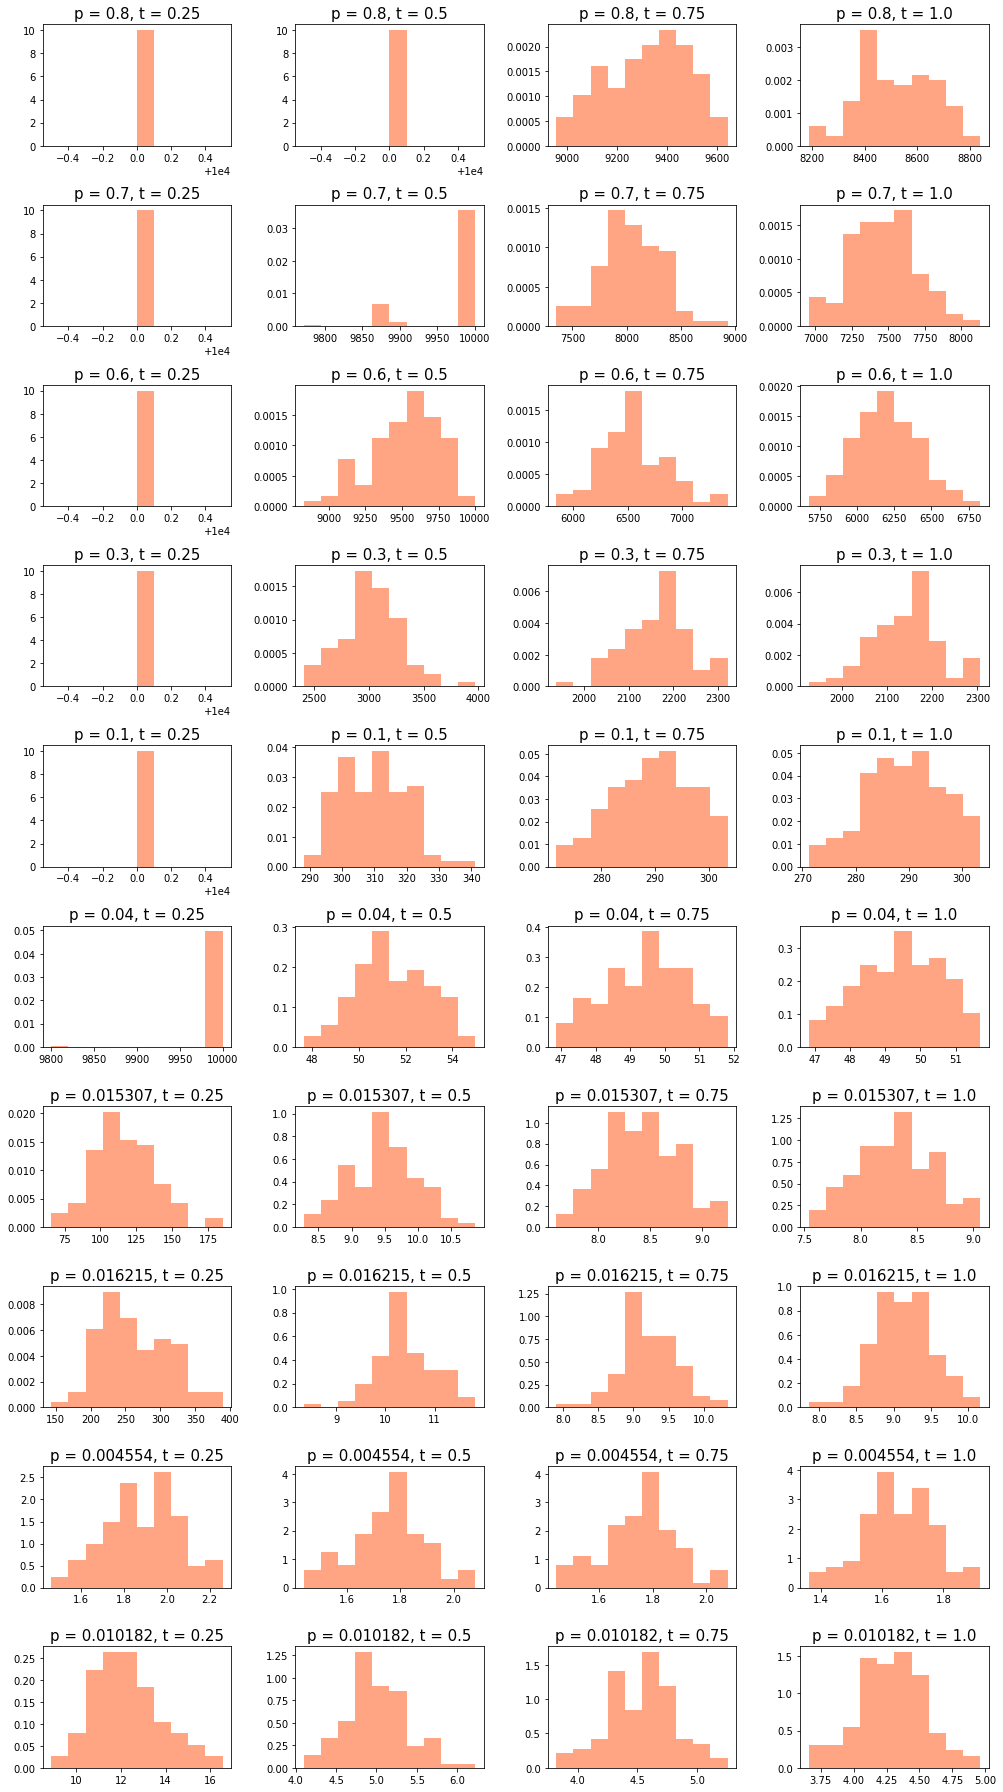

In [27]:
t = False

# reading resistances
res = np.load('data/res_phase1.npy')

for n in [1000, 5000, 10000]:
    with open('data/keys{}.txt'.format(n), 'r') as f:
        prob = eval(f.read())
    plot_metric_counts(prob, n, res, t)

## Inflection point

In [9]:
def plot_inflection(prob, n, res, t):
    # check the t type
    if t:
        thr = 'maxpred'
    else : thr = 'pred'

    fig, axs = plt.subplots(len(prob), 4, figsize = (15,10))
    for i, p in enumerate(prob):
        # load data
        data = pd.read_csv('data/{}/data_node_{}_{}.csv'.format(thr, n, p))
        for j, group in enumerate(data[['metric','max_level','resistance']].groupby('resistance')):
            axs[i,j].set_title('r = {}, t = {}'.format(round(p,6),group[0]), fontsize=15)
            _ = axs[i,j].plot(group[1].metric.values, group[1].max_level.values, 'o', color='lightsteelblue', alpha= 0.7)
            _ = axs[i,j].set_xlabel('metric')
            _ = axs[i,j].set_ylabel('max level')
                

        # delete from memory
        del data

    #plt.suptitle('Metric VS Max Level'.format(n, lab), y=1.01, fontsize=20)
    plt.tight_layout()
    plt.savefig('images/inflection_point_{}_{}.jpeg'.format(thr, n), bbox_inches='tight')

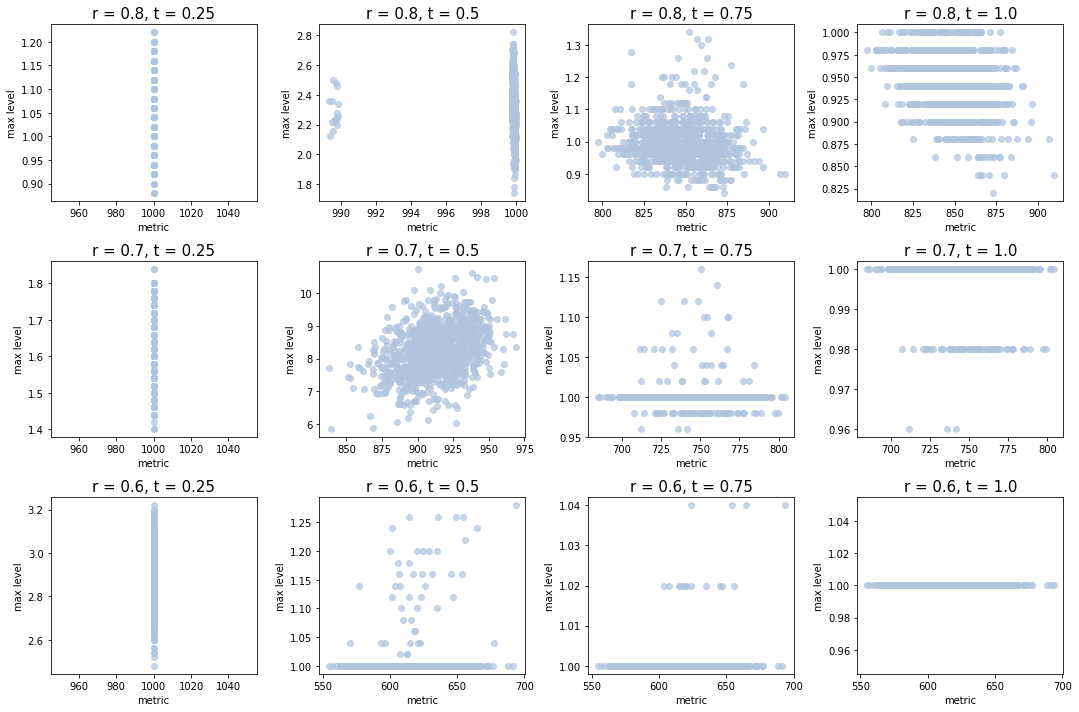

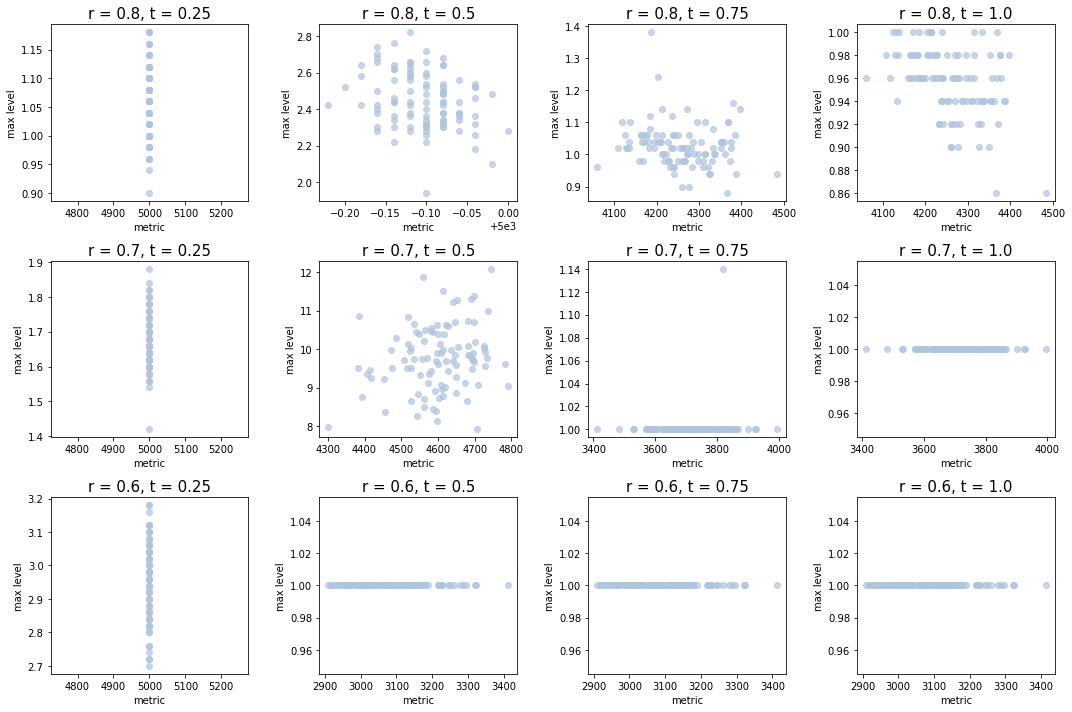

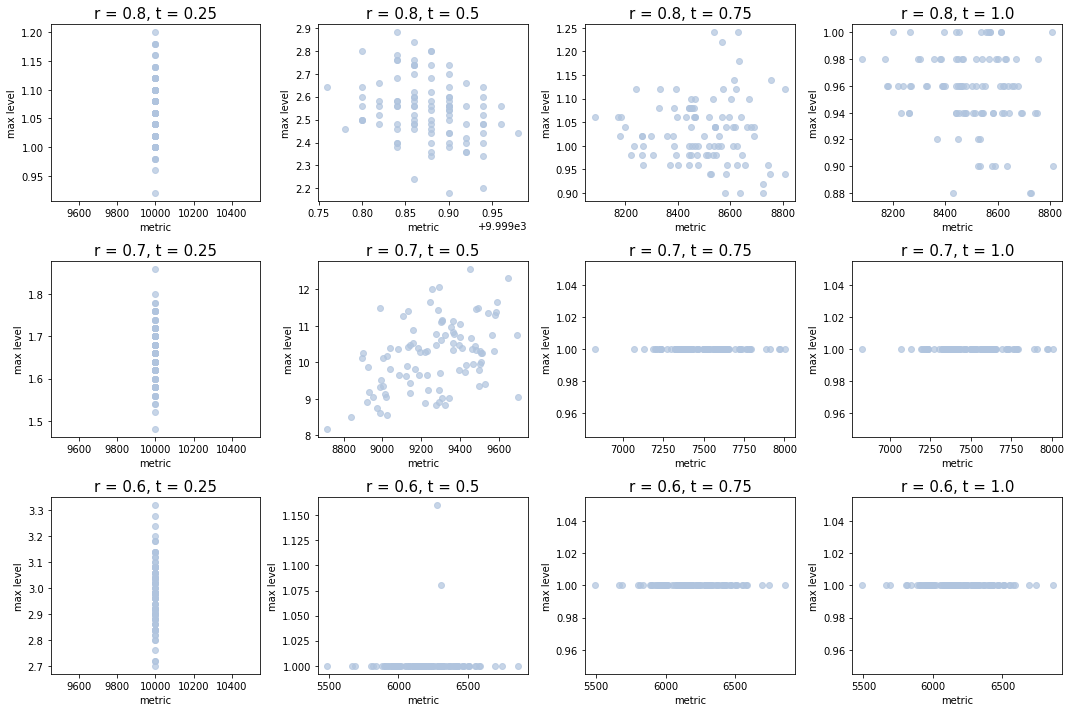

In [10]:
t = True

rad = [0.8, 0.7, 0.6]

for n in [1000, 5000, 10000]:
    res = np.load('data/res_phase1.npy')
    plot_inflection(rad, n, res, t)

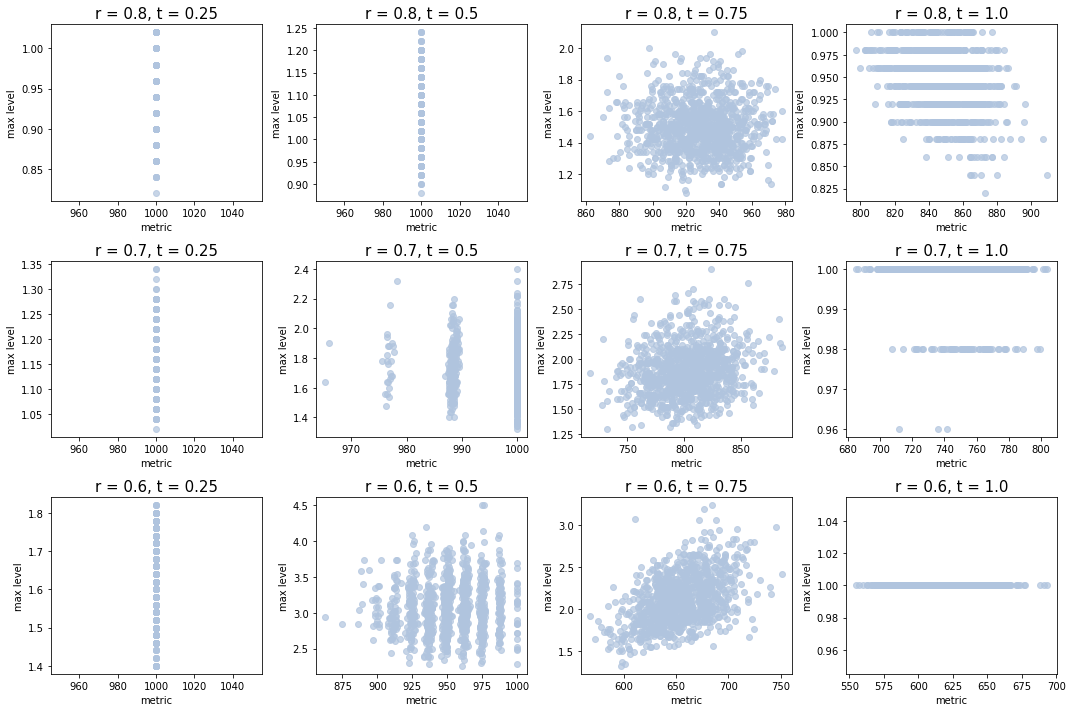

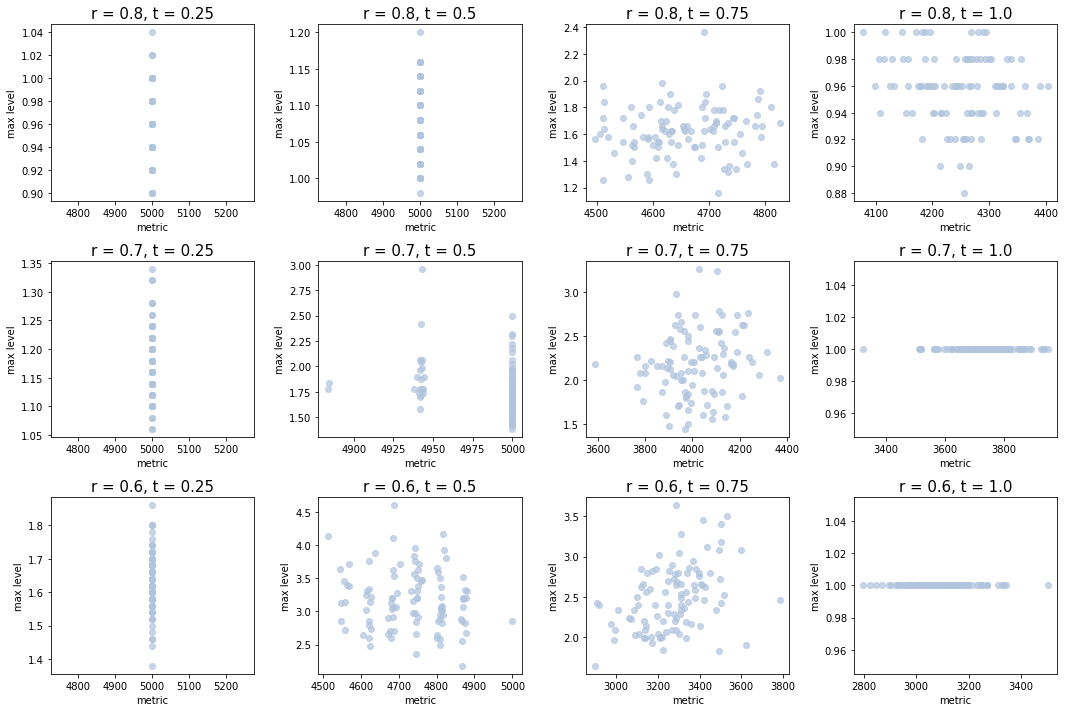

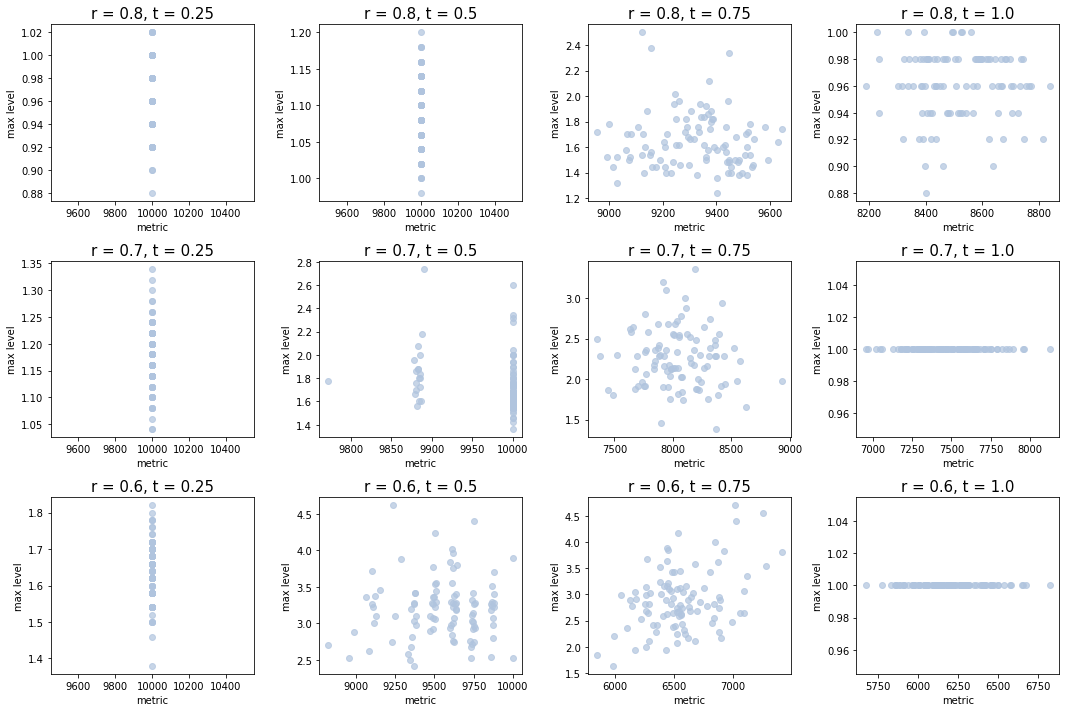

In [11]:
t = False

rad = [0.8, 0.7, 0.6]

for n in [1000, 5000, 10000]:
    res = np.load('data/res_phase1.npy')
    plot_inflection(rad, n, res, t)